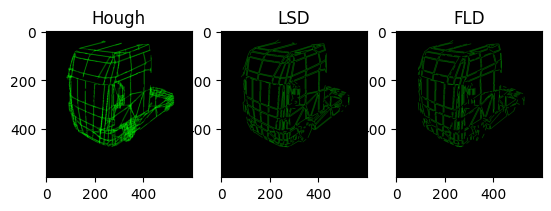

<Figure size 1000x1000 with 0 Axes>

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('928\\linetest\\4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,255,apertureSize = 3)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=10, maxLineGap=10)
blank_image=np.zeros_like(img)
for line in lines.reshape(-1,4):
    x1, y1, x2, y2 = line
    cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 1)
plt.subplot(131),plt.imshow(blank_image),plt.title('Hough')
cv2.imwrite('928\\linetest\\hough4.png',blank_image,[cv2.IMWRITE_PNG_COMPRESSION, 0])
lsd = cv2.createLineSegmentDetector(0)
lines = lsd.detect(edges)[0]
blank_image=np.zeros_like(img)
for dline in lines:
    x0 = int(round(dline[0][0]))
    y0 = int(round(dline[0][1]))
    x1 = int(round(dline[0][2]))
    y1 = int(round(dline[0][3]))
    cv2.line(blank_image, (x0, y0), (x1,y1), (0, 255, 0), 1)
plt.subplot(132),plt.imshow(blank_image),plt.title('LSD')
cv2.imwrite('928\\linetest\\lsd4.png',blank_image,[cv2.IMWRITE_PNG_COMPRESSION, 0])
fld = cv2.ximgproc.createFastLineDetector()
lines = fld.detect(edges)
blank_image=np.zeros_like(img)
for dline in lines:
    x0 = int(round(dline[0][0]))
    y0 = int(round(dline[0][1]))
    x1 = int(round(dline[0][2]))
    y1 = int(round(dline[0][3]))
    cv2.line(blank_image, (x0, y0), (x1,y1), (0,255,0), 1)
plt.subplot(133),plt.imshow(blank_image),plt.title('FLD')
cv2.imwrite('928\\linetest\\fld4.png',blank_image,[cv2.IMWRITE_PNG_COMPRESSION, 0])
plt.figure(figsize=(10,10))
plt.show()
